In [291]:
import pandas as pd
import matplotlib as plt 
import seaborn as sns 
import numpy as np
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import glob
import matplotlib.pyplot as plt
from collections import Counter

## Import Datatset

In [292]:
df = pd.read_csv('/Users/pierreloyal/Desktop/Bootcamp CA/vs_group/merged_file.csv')

## Creation Columns Amount, OrderCount and Recency 

In [293]:
df_monetary = df.groupby('CustomerID', as_index=False)['Sales'].sum().rename(columns={'Sales': 'Amount'})
df_monetary['Amount'] = df_monetary['Amount'] / 100
df_monetary.head()

,CustomerID,Amount
0,AA-10315,293.09
1,AA-10375,1717.92
2,AA-10480,741.44
3,AA-10645,801.64
4,AB-10015,944.51


In [294]:
df_frequency = df.groupby('CustomerID', as_index=False)['OrderID'].count().rename(columns={'OrderID': 'OrderCount'})
df_frequency.head()

,CustomerID,OrderCount
0,AA-10315,5
1,AA-10375,9
2,AA-10480,4
3,AA-10645,6
4,AB-10015,3


In [295]:

df['OrderDate'] = pd.to_datetime(df['OrderDate'])

df_last_order = df.groupby('CustomerID', as_index=False)['OrderDate'].max()

# Define the reference date
reference_date = pd.to_datetime('2024-05-21')

# Calculate recency
df_last_order['Recency'] = (reference_date - df_last_order['OrderDate']).dt.days

# Rename the DataFrame for clarity
df_recency = df_last_order[['CustomerID', 'Recency']]

# Display the result
df_recency.head()

,CustomerID,Recency
0,AA-10315,2447
1,AA-10375,2359
2,AA-10480,2440
3,AA-10645,2388
4,AB-10015,2901


In [296]:
merged_df = pd.merge(df_monetary, df_frequency, on='CustomerID')

# Merging the result with df3 on 'CustomerID'
final_merged_df = pd.merge(merged_df, df_recency, on='CustomerID')

# Display the result
final_merged_df.head()

,CustomerID,Amount,OrderCount,Recency
0,AA-10315,293.09,5,2447
1,AA-10375,1717.92,9,2359
2,AA-10480,741.44,4,2440
3,AA-10645,801.64,6,2388
4,AB-10015,944.51,3,2901


In [297]:
final_merged_df.shape

(793, 4)

## Boxplot parameters

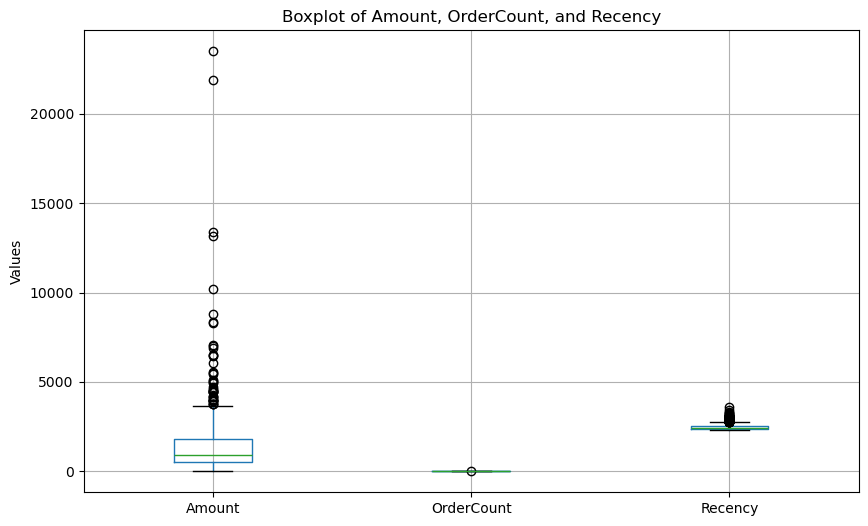

In [298]:
plt.figure(figsize=(10, 6))
final_merged_df[['Amount', 'OrderCount', 'Recency']].boxplot()
plt.title('Boxplot of Amount, OrderCount, and Recency')
plt.ylabel('Values')
plt.show()

## Outliners Removal 

In [312]:
# Function to remove outliers using IQR
def remove_outliers_iqr(final_merged_df, column):
    Q1 = final_merged_df[column].quantile(0.25)
    Q3 = final_merged_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return final_merged_df[(final_merged_df[column] >= lower_bound) & (final_merged_df[column] <= upper_bound)]

# Remove outliers for 'Amount', 'OrderCount', and 'Recency'
final_merged_df_no_outliers = final_merged_df.copy()
for column in ['Amount', 'OrderCount', 'Recency']:
    final_merged_df_no_outliers = remove_outliers_iqr(final_merged_df_no_outliers, column)


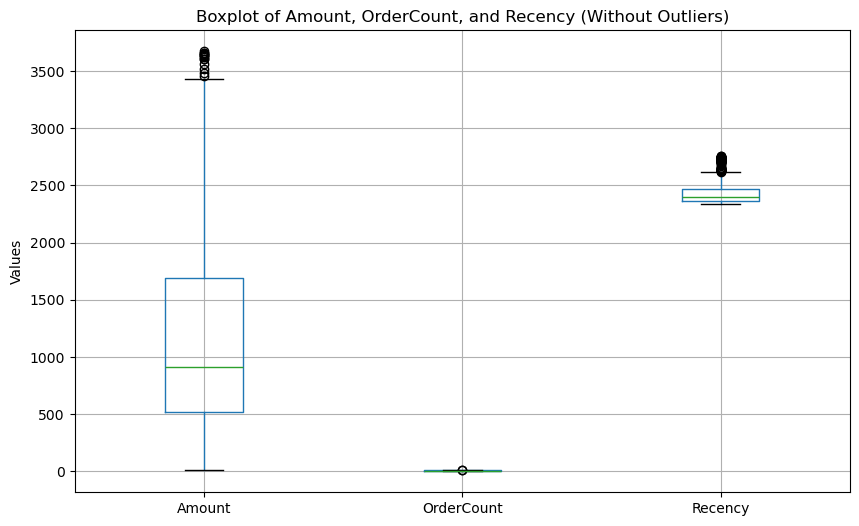

In [313]:
# Plotting the Boxplot without outliers
plt.figure(figsize=(10, 6))
final_merged_df_no_outliers[['Amount', 'OrderCount', 'Recency']].boxplot()
plt.title('Boxplot of Amount, OrderCount, and Recency (Without Outliers)')
plt.ylabel('Values')
plt.show()


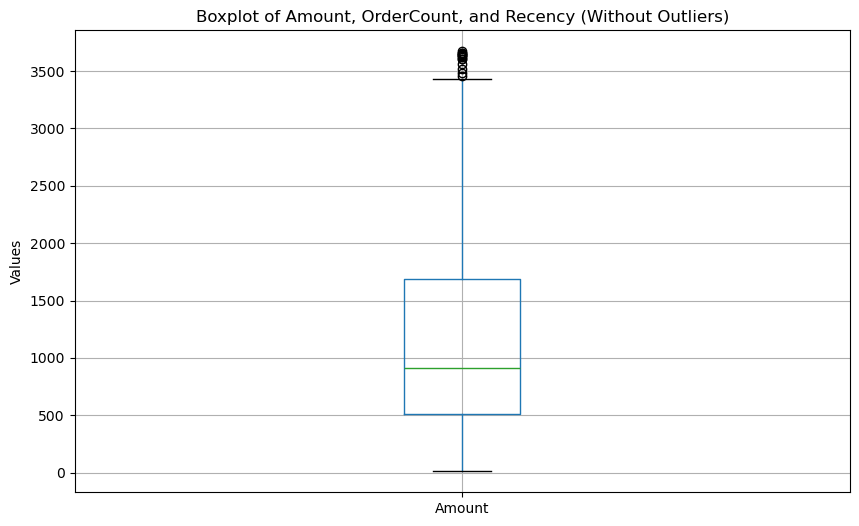

In [314]:
# Plotting the Boxplot without outliers
plt.figure(figsize=(10, 6))
final_merged_df_no_outliers[['Amount']].boxplot()
plt.title('Boxplot of Amount, OrderCount, and Recency (Without Outliers)')
plt.ylabel('Values')
plt.show()

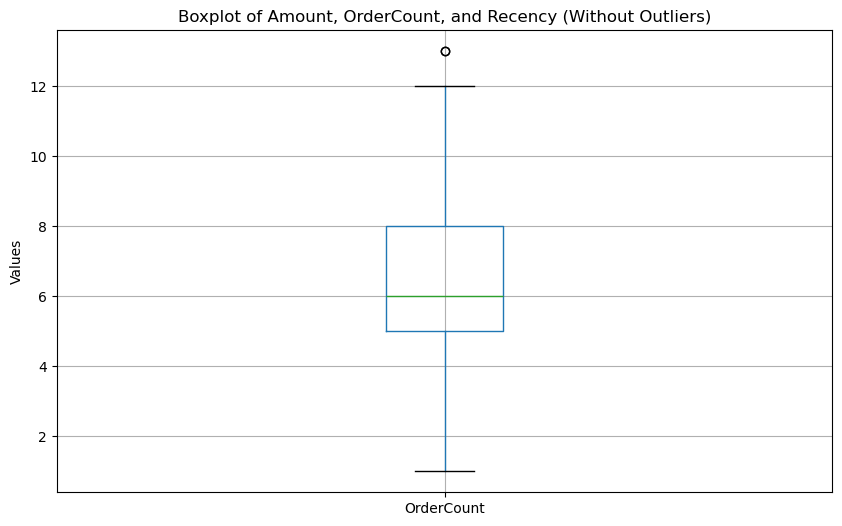

In [315]:
# Plotting the Boxplot without outliers
plt.figure(figsize=(10, 6))
final_merged_df_no_outliers[['OrderCount']].boxplot()
plt.title('Boxplot of Amount, OrderCount, and Recency (Without Outliers)')
plt.ylabel('Values')
plt.show()

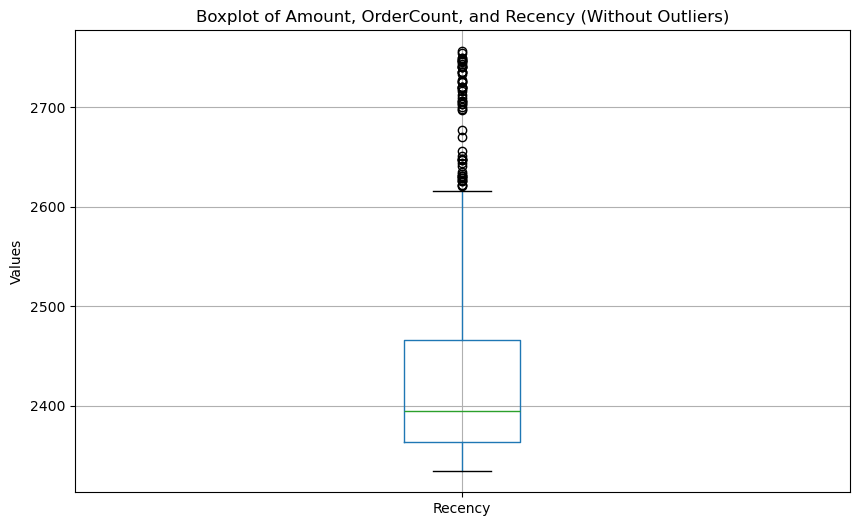

In [316]:
# Plotting the Boxplot without outliers
plt.figure(figsize=(10, 6))
final_merged_df_no_outliers[['Recency']].boxplot()
plt.title('Boxplot of Amount, OrderCount, and Recency (Without Outliers)')
plt.ylabel('Values')
plt.show()

## Rescaling attributes Amount, OrderCount and Recency

In [324]:
# Rescaling the attributes
rfm_df = final_merged_df_no_outliers[['Amount', 'OrderCount', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'OrderCount', 'Recency']
rfm_df_scaled.head()

,Amount,OrderCount,Recency
0,-1.006119,-0.550509,0.101076
1,0.617473,1.154771,-0.749679
2,-0.495225,-0.976829,0.033402
3,-0.426627,-0.124189,-0.469316
4,-0.804587,0.728451,-0.527322


## K-means with 4 Clusters

In [325]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)
# Assign the labels to each data point, and execute the following script.
kmeans.labels_
label_list=kmeans.labels_
sorted(Counter(label_list).items())

/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[(0, 128), (1, 251), (2, 115), (3, 196)]

## Elbow Curve

/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.wa

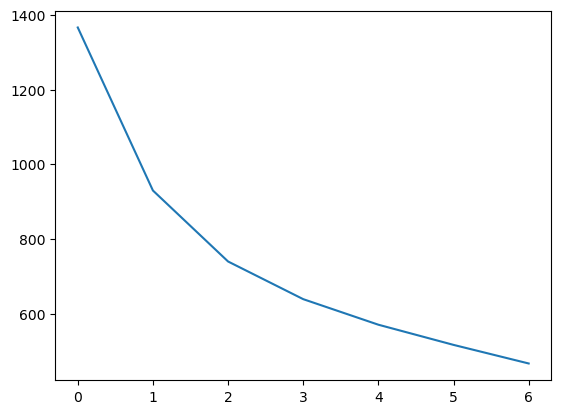

In [326]:
# Elbow-curve /SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)

    ssd.append(kmeans.inertia_)

# plot the SSDs for each n_clusters
plt.plot(ssd)

## Silhouette Analysis

In [327]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:

    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=2, the silhouette score is 0.3217285504373677
For n_clusters=3, the silhouette score is 0.3669315722610476
For n_clusters=4, the silhouette score is 0.32431500555431336
For n_clusters=5, the silhouette score is 0.3203517379339736


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=6, the silhouette score is 0.31551924202142956


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=7, the silhouette score is 0.27228150487273606


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=8, the silhouette score is 0.2878223361855296


## K-means with 3 clusters

In [321]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)
# Assign the labels to each data point, and execute the following script.
kmeans.labels_
label_list=kmeans.labels_
sorted(Counter(label_list).items())

/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[(0, 120), (1, 363), (2, 207)]

In [322]:
# assign the label
final_merged_df_no_outliers['Cluster_Id'] = kmeans.labels_
final_merged_df_no_outliers.head()

,CustomerID,Amount,OrderCount,Recency,Cluster_Id
0,AA-10315,293.09,5,2447,1
1,AA-10375,1717.92,9,2359,2
2,AA-10480,741.44,4,2440,1
3,AA-10645,801.64,6,2388,1
5,AB-10060,469.95,8,2382,1


ValueError: Could not interpret input 'Frequency'

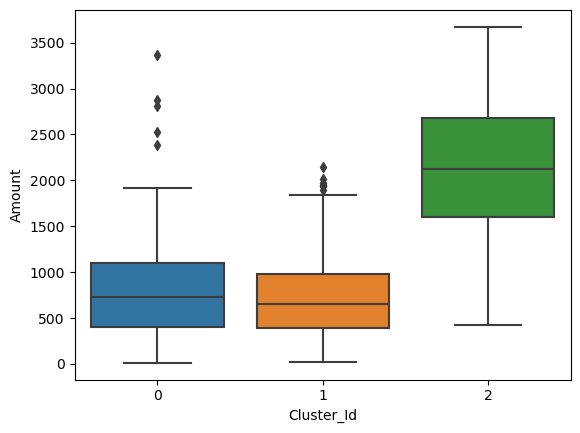

In [323]:
# Box plot to visualize Cluster Id vs Amount
sns.boxplot(x='Cluster_Id', y='Amount', data=final_merged_df_no_outliers)

# Box plot to visualize Cluster Id vs Frequency
sns.boxplot(x='Cluster_Id', y='Frequency', data=final_merged_df_no_outliers)

# Box plot to visualize Cluster Id vs Recency
sns.boxplot(x='Cluster_Id', y='Recency', data=final_merged_df_no_outliers)

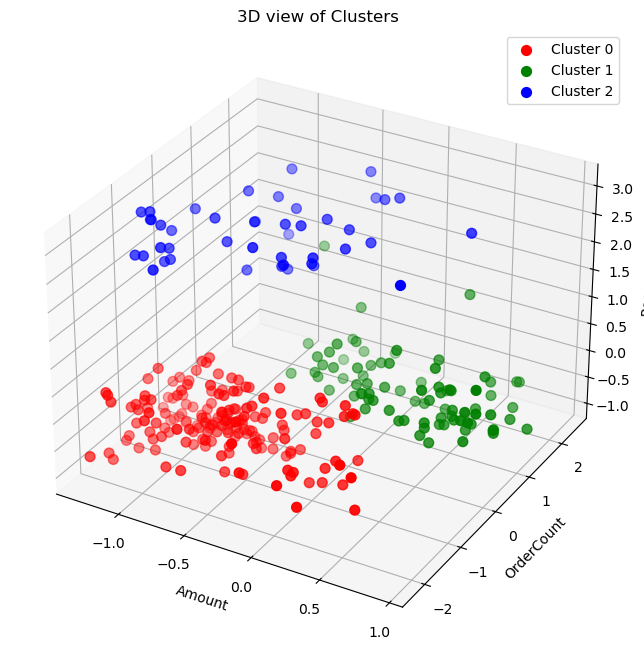

In [328]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Assuming 'final_merged_df_no_outliers' is your dataframe
# and 'rfm_df_scaled' contains the scaled values for 'Amount', 'OrderCount', and 'Recency'

# Add the cluster labels to the scaled dataframe
rfm_df_scaled['Cluster_Id'] = kmeans.labels_

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Assign colors to clusters
colors = ['r', 'g', 'b']  # You can add more colors if needed

# Plot each cluster with a different color
for cluster_id in range(3):
    cluster_data = rfm_df_scaled[rfm_df_scaled['Cluster_Id'] == cluster_id]
    ax.scatter(cluster_data['Amount'], cluster_data['OrderCount'], cluster_data['Recency'],
               c=colors[cluster_id], label=f'Cluster {cluster_id}', s=50)

# Add labels
ax.set_xlabel('Amount')
ax.set_ylabel('OrderCount')
ax.set_zlabel('Recency')
ax.set_title('3D view of Clusters')
ax.legend()

# Show plot
plt.show()